# Value at risk (VaR)

AK


Estimating the risk of a portfolio is crucial for long-term capital growth, and there are various techniques available for risk management. Here we will focus on **Value-at-Risk** (*VaR*). 

VaR can be calculated in two main ways: through Monte Carlo simulation or the variance-covariance method. VaR provides an estimate of the maximum potential loss a portfolio may experience over a period of time, and it can be calculated at different confidence levels.

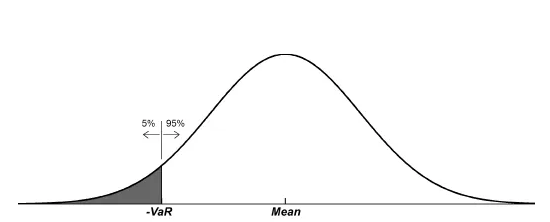

For example, if the VaR of a portfolio is determined to be 116,000 CAD at a 95% confidence level, it means there is a 95% chance that the portfolio will not lose more than 116,000 CAD on the following day.

It is essential to note that the standard VaR calculation makes some assumptions, such as assuming a normal distribution of returns, which does not usually reflect reality for most assets. Nevertheless, it offers a starting point by using a more simplistic approach (changes can be made to account for different distributions). In addition, VaR is best suitable for accounting for losses in standard market conditions and may not be sufficient in the case of extreme or unusual events.

To calculate the VaR of a portfolio, we can follow these steps:

1. Calculate the periodic returns of the stocks in your portfolio.
2. Create a covariance matrix based on the returns to capture the interdependencies among the assets.
3. Calculate the portfolio mean and standard deviation, taking into account the investment levels of each stock in the portfolio (weighted average).
4. Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean.
5. Estimate the Value-at-Risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4. This will provide an estimate of the potential maximum loss the portfolio may experience based on the specified confidence level.
  

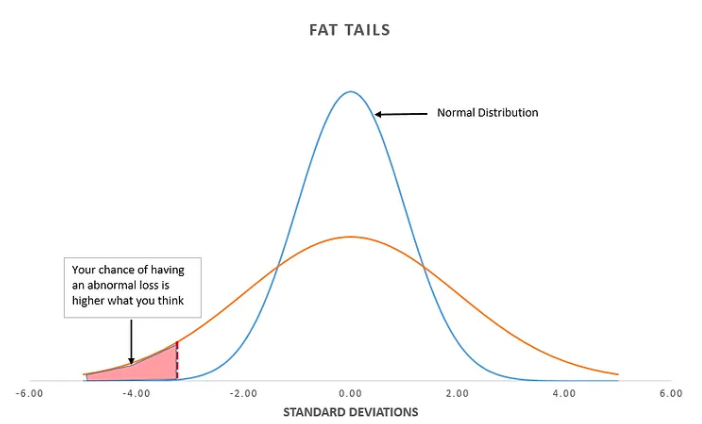

### 1. Calculate periodic returns of the stocks

In [10]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
    
#Create our portfolio of equities
tickers = ['AAPL','META', 'TSLA', 'GOOGL']
 
#Set the investment weights (picked for example)
weights = np.array([.25, .15, .40, .20])
 
#Set an initial investment level
initial_investment = 750000
 
#Download closing prices
#data = pdr.get_data_yahoo(tickers, start="2021-01-01", end=dt.date.today())['Close']

data = yf.download(tickers, start="2021-01-01", end=dt.date.today())['Close']

 
#From the closing prices, calculate periodic returns
returns = data.pct_change()

[*********************100%***********************]  4 of 4 completed


In [11]:
returns.tail()

,AAPL,GOOGL,META,TSLA
Date,,,,
2023-04-13,0.034104,0.026663,0.029673,0.029689
2023-04-14,-0.002114,0.013404,0.005174,-0.004841
2023-04-17,0.000121,-0.026637,-0.011874,0.011027
2023-04-18,0.007505,-0.013872,-0.004432,-0.014596
2023-04-19,0.006968,-0.003062,-0.010051,-0.020183


### 2. Create a covariance matrix based on the returns


A covariance matrix is a mathematical representation of the covariance between two or more variables in a dataset. It is a square matrix where the diagonal elements represent the variance of each variable, and the off-diagonal elements represent the covariance between pairs of variables.

Covariance measures the extent to which two variables change together. A positive covariance indicates that when one variable increases, the other tends to increase as well, while a negative covariance indicates that when one variable increases, the other tends to decrease. A covariance of zero indicates that there is no linear relationship between the variables.

In the context of financial risk modeling and portfolio analysis, a covariance matrix is commonly used to capture the interdependencies or correlations among the returns of different assets in a portfolio. It is a key input in various risk management techniques, such as portfolio optimization, Value-at-Risk (VaR) calculation, and stress testing. By understanding the covariance between assets, investors can better assess the risk and diversification benefits of their portfolios.

In [13]:
#Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix


,AAPL,GOOGL,META,TSLA
AAPL,0.000358,0.000277,0.000338,0.000418
GOOGL,0.000277,0.000434,0.000437,0.000357
META,0.000338,0.000437,0.001026,0.000441
TSLA,0.000418,0.000357,0.000441,0.001514


### 3. Calculate the portfolio mean and standard deviation

In [14]:
#Calculate mean returns for each stock
avg_rets = returns.mean()
 
#Calculate mean returns for portfolio overall, 
#using mean, using dot product formula to 
#normalize against investment weights
port_mean = avg_rets.dot(weights)
 
#Calculate portfolio standard deviation
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))
 
#Calculate mean of given investment
mean_investment = (1+port_mean) * initial_investment
             
#Calculate standard deviation of given investmnet
stdev_investment = initial_investment * port_stdev

### 4. Calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [15]:
#Select our confidence interval (I'll choose 95% here)
conf_level1 = 0.05

#Using SciPy ppf method to generate values for the
#inverse cumulative distribution function to a normal distribution
#Plugging in the mean, standard deviation of our portfolio
#as calculated above

from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)


### 5. Estimate the value at risk (VaR) for the portfolio by subtracting the initial investment from the calculation in step 4

In [16]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = initial_investment - cutoff1
var_1d1

28182.667482304852

Here we are saying with 95% confidence that the loss of our portfolio will not exceed ~ 28182 CAD over a one day period.

### Value at risk over n-day time period

What if we wanted to calculate this over a larger window of time? Below we can easily do that by just taking our 1 day VaR and multiplying it by the square root of the time period

1 day VaR @ 95% confidence: 28182.67
2 day VaR @ 95% confidence: 39856.31
3 day VaR @ 95% confidence: 48813.81
4 day VaR @ 95% confidence: 56365.33
5 day VaR @ 95% confidence: 63018.36
6 day VaR @ 95% confidence: 69033.15
7 day VaR @ 95% confidence: 74564.33
8 day VaR @ 95% confidence: 79712.62
9 day VaR @ 95% confidence: 84548.0
10 day VaR @ 95% confidence: 89121.42
11 day VaR @ 95% confidence: 93471.33
12 day VaR @ 95% confidence: 97627.62
13 day VaR @ 95% confidence: 101614.05
14 day VaR @ 95% confidence: 105449.89
15 day VaR @ 95% confidence: 109151.0


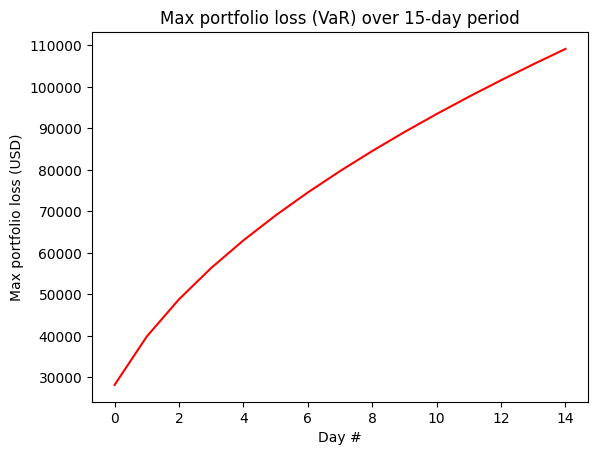

In [17]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")


One more step. Checking distributions of our equities against normal distribution

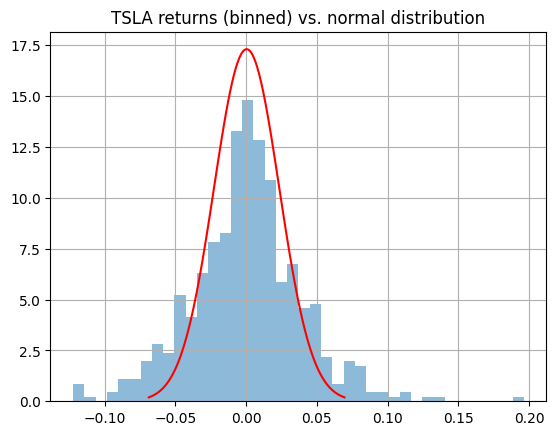

In [19]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

returns['TSLA'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("TSLA returns (binned) vs. normal distribution")
plt.show()

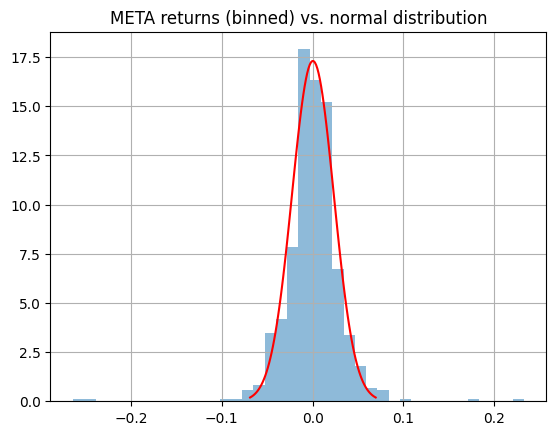

In [20]:
returns['META'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("META returns (binned) vs. normal distribution")
plt.show()

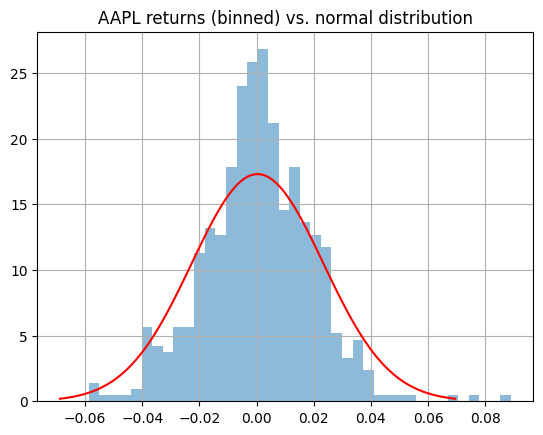

In [22]:
returns['AAPL'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("AAPL returns (binned) vs. normal distribution")
plt.show()

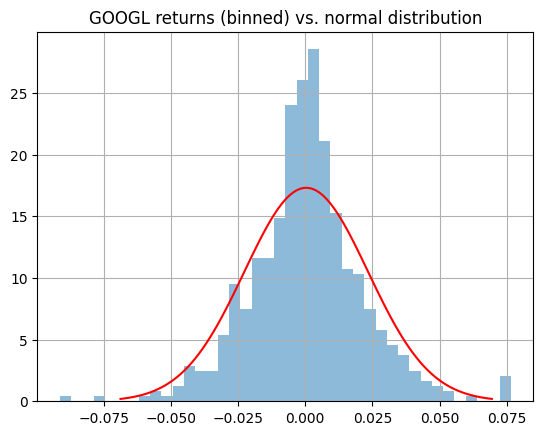

In [23]:
returns['GOOGL'].hist(bins=40, density=True,histtype="stepfilled",alpha=0.5)
x = np.linspace(port_mean - 3*port_stdev, port_mean+3*port_stdev,100)
plt.plot(x, scipy.stats.norm.pdf(x, port_mean, port_stdev), "r")
plt.title("GOOGL returns (binned) vs. normal distribution")
plt.show()